In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [5]:
data = pd.read_csv('household_power_consumption.txt', sep=';', 
                   na_values=['nan', '?'], 
                   low_memory=False)

In [4]:
# Combine 'Date' and 'Time' columns to create 'datetime' column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Check for missing values
print(data.isna().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [3]:
data = data.ffill()

# Select relevant features
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Resample data to daily mean
daily_data = data[features].resample('D').mean()

# Display the resampled data
print(daily_data.head())

# Split data into train and test sets
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Fit ARIMA model
model = ARIMA(train['Global_active_power'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

            Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime                                                                      
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361       

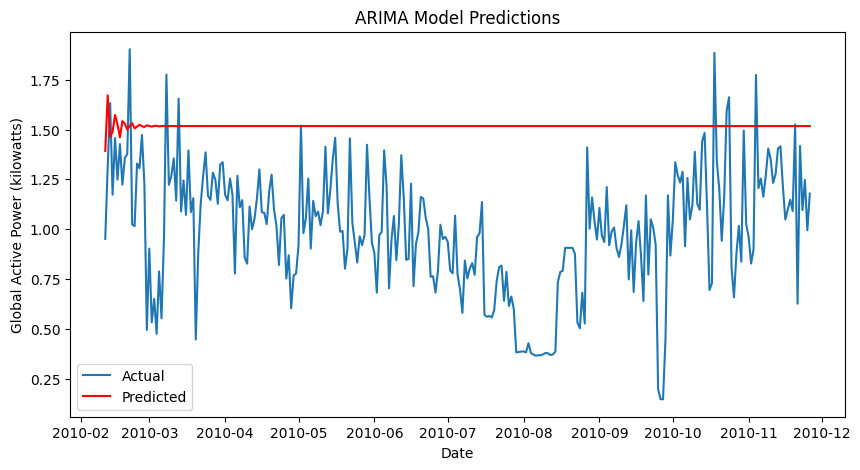

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Global_active_power'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

In [5]:
mae = mean_absolute_error(test['Global_active_power'], predictions)
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], predictions))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 0.5399592121606527
RMSE: 0.6143000675810778
